In [1]:
from netCDF4 import Dataset, num2date
#we could otherwise import the whole netCDF4 instead that specific functions. 
#if so, to call specific func we type ex netCDF4.num2datea

In [2]:
#now we use the package to open the file and extract the data from the file
#for visualisation is better to use another package
#our file has 4 variables: latitude, longitude, time, temperature(air) 
#for each time, lat and long...it has the value of temperature
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#our dataset has 4 variables so it s a bit more messy to work with: the time! 
#so it is not a table but a cube
#now we open the file using netCDF4 and extract data
file = 'air.mon.mean.nc'
nc = Dataset(file, mode='r')

In [4]:
nc.variables.keys()

dict_keys(['lat', 'lon', 'time', 'air'])

In [5]:
#we are now storing the values of each variable under the names (lat, lon, air, time)
#so: going to nc then to variables get the key lat and store all values into a variable we call lat
#the last one is a bit funky because its not a number nor a string but is a format called datetime.
#so we want to make sure that python understands we are talking about a date and not just a number (num2date)
# ':' means we want aaall the rows and not just one
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
air = nc.variables['air'][:]
time_var = nc.variables['time']
dtime = num2date(time_var[:], time_var.units)

In [6]:
#since we have 3 dimensions we have to tell pandas that he is excepting a multiIndex
#the first variable names is just a list with the names of the things
#the second line we create a MultiIndex on time, lon and lat
#then we pass the values of air temp
names = ['time', 'lat','lon']
index = pd.MultiIndex.from_product([dtime, lat, lon], names=names)
df = pd.DataFrame ({'Air':air.flatten()}, index=index)

In [7]:
df

Air
time       lat   lon             
1948-01-01  90.0 0.0   -34.926773
                 2.5   -34.926773
                 5.0   -34.926773
                 7.5   -34.926773
                 10.0  -34.926773
...                           ...
2020-01-01 -90.0 347.5 -24.799204
                 350.0 -24.799204
                 352.5 -24.799204
                 355.0 -24.799204
                 357.5 -24.799204

[9092880 rows x 1 columns]

In [8]:
#what this is doing is we are getting rid of that pesky date time values 
#and creating a new column just with the year and another just with the month
year = [row.year for row in dtime]
month =[row.month for row in dtime]

In [9]:
#we are creating the pandas dataframe (the excell-like thing) but now with our new column year
#NB. here we have the option of adding a column for 'month' but my laptop goes KO so I didnt
names = ['year', 'lat', 'lon']
index = pd.MultiIndex.from_product([year, lat, lon], names=names)
df = pd.DataFrame({'Air': air.flatten()}, index=index).reset_index()

In [10]:
df

,year,lat,lon,Air
0,1948,90.0,0.0,-34.926773
1,1948,90.0,2.5,-34.926773
2,1948,90.0,5.0,-34.926773
3,1948,90.0,7.5,-34.926773
4,1948,90.0,10.0,-34.926773
...,...,...,...,...
9092875,2020,-90.0,347.5,-24.799204
9092876,2020,-90.0,350.0,-24.799204
9092877,2020,-90.0,352.5,-24.799204
9092878,2020,-90.0,355.0,-24.799204


In [11]:
df.groupby('year').get_group(2000)

,year,lat,lon,Air
6559488,2000,90.0,0.0,-29.164190
6559489,2000,90.0,2.5,-29.164190
6559490,2000,90.0,5.0,-29.164190
6559491,2000,90.0,7.5,-29.164190
6559492,2000,90.0,10.0,-29.164190
...,...,...,...,...
6685627,2000,-90.0,347.5,-23.232578
6685628,2000,-90.0,350.0,-23.232578
6685629,2000,-90.0,352.5,-23.232578
6685630,2000,-90.0,355.0,-23.232578


In [12]:
# df.groupby(['lat','lon']).mean()
# df.groupby(['lon','lat','year']).mean()

# the idea is that what the user chooses goes inside the get_group. for example, the user wants to see year==2000
# then the script should run:
# df.groupby('year').get_group(year_chosen_by_user)

In [13]:
df = df.groupby(['lon','lat','year']).mean().reset_index()
df = df[df.year != 2020]

print(df)

          lon   lat  year        Air
0         0.0 -90.0  1948 -47.957283
1         0.0 -90.0  1949 -47.193073
2         0.0 -90.0  1950 -47.900543
3         0.0 -90.0  1951 -46.080376
4         0.0 -90.0  1952 -46.012402
...       ...   ...   ...        ...
767370  357.5  90.0  2015 -14.228957
767371  357.5  90.0  2016 -11.659095
767372  357.5  90.0  2017 -12.596512
767373  357.5  90.0  2018 -13.097721
767374  357.5  90.0  2019 -14.127932

[756864 rows x 4 columns]


In [18]:
#Selecting Data for a Specific Location based on lat&Long 
#The coordinates need to be rounded based on the grid values (every 2.5°)
df_lisbon = df[(df.lat == 37.5)&(df.lon == 350)]
df_salvador = df[(df.lat == 12.5)&(df.lon == 322.5)]

In [19]:
df_lisbon
df_salvador

,lon,lat,year,Air
690434,322.5,12.5,1948,24.724546
690435,322.5,12.5,1949,24.439535
690436,322.5,12.5,1950,24.522449
690437,322.5,12.5,1951,24.683224
690438,322.5,12.5,1952,24.612885
...,...,...,...,...
690501,322.5,12.5,2015,25.101936
690502,322.5,12.5,2016,25.636391
690503,322.5,12.5,2017,25.559212
690504,322.5,12.5,2018,24.701239


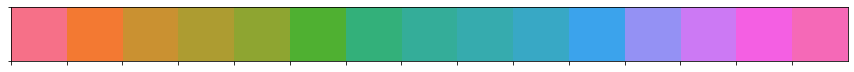

In [20]:
sns.palplot(sns.color_palette("husl", 15))

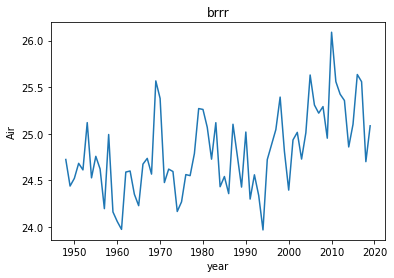

In [25]:
time_series_lisbon = sns.lineplot (x='year',
                                  y = 'Air',
                                  data = df_salvador
                                  ).set_title('brrr')

plt.show()